In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")

In [2]:
train = pd.read_csv('titanic/train.csv')
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
test = pd.read_csv('titanic/test.csv')
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [4]:
target = pd.read_csv('titanic/gender_submission.csv')
target

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [5]:
test['Survived'] = target['Survived']

In [6]:
train.duplicated().sum(),test.duplicated().sum()

(0, 0)

In [7]:
train_shape = train.shape
train_shape, test.shape

((891, 12), (418, 12))

In [8]:
train = train.append(test, ignore_index=True)
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 122.8+ KB


In [10]:
train.drop(columns=['PassengerId', 'Cabin', 'Ticket', 'Name'], inplace = True)
train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
1304,0,3,male,NaN,0,0,8.0500,S
1305,1,1,female,39.0,0,0,108.9000,C
1306,0,3,male,38.5,0,0,7.2500,S
1307,0,3,male,NaN,0,0,8.0500,S


In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  1309 non-null   int64  
 1   Pclass    1309 non-null   int64  
 2   Sex       1309 non-null   object 
 3   Age       1046 non-null   float64
 4   SibSp     1309 non-null   int64  
 5   Parch     1309 non-null   int64  
 6   Fare      1308 non-null   float64
 7   Embarked  1307 non-null   object 
dtypes: float64(2), int64(4), object(2)
memory usage: 81.9+ KB


In [12]:
for column in train.columns:
    if column not in  ['Survived', 'Fare', 'Age']:
        print(train[[column, 'Survived']].groupby([column], as_index=False).mean().sort_values(by= column, ascending=False))
        print()

   Pclass  Survived
2       3  0.269394
1       2  0.422383
0       1  0.575851

      Sex  Survived
1    male   0.12930
0  female   0.82618

   SibSp  Survived
6      8  0.111111
5      5  0.166667
4      4  0.181818
3      3  0.250000
2      2  0.452381
1      1  0.520376
0      0  0.334456

   Parch  Survived
7      9  0.500000
6      6  0.000000
5      5  0.166667
4      4  0.333333
3      3  0.625000
2      2  0.530973
1      1  0.547059
0      0  0.331337

  Embarked  Survived
2        S  0.333698
1        Q  0.439024
0        C  0.492593



In [13]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [14]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
train['Sex']= encoder.fit_transform(train['Sex'])
train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
1304,0,3,1,NaN,0,0,8.0500,S
1305,1,1,0,39.0,0,0,108.9000,C
1306,0,3,1,38.5,0,0,7.2500,S
1307,0,3,1,NaN,0,0,8.0500,S


In [15]:
train.Sex.value_counts()

1    843
0    466
Name: Sex, dtype: int64

In [16]:
train[train.Embarked.isnull()]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
61,1,1,0,38.0,0,0,80.0,NaN
829,1,1,0,62.0,0,0,80.0,NaN


In [17]:
train[train.Fare.isnull()]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
1043,0,3,1,60.5,0,0,NaN,S


In [18]:
train[train.Age.isnull()]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
5,0,3,1,NaN,0,0,8.4583,Q
17,1,2,1,NaN,0,0,13.0000,S
19,1,3,0,NaN,0,0,7.2250,C
26,0,3,1,NaN,0,0,7.2250,C
28,1,3,0,NaN,0,0,7.8792,Q
...,...,...,...,...,...,...,...,...
1299,1,3,0,NaN,0,0,7.7208,Q
1301,1,3,0,NaN,0,0,7.7500,Q
1304,0,3,1,NaN,0,0,8.0500,S
1307,0,3,1,NaN,0,0,8.0500,S


In [19]:
train_rest = train.loc[~train.Embarked.isnull() & ~train.Age.isnull() & ~train.Fare.isnull()]
train_rest.reset_index(inplace=True)
train_rest

,index,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,0,3,1,22.0,1,0,7.2500,S
1,1,1,1,0,38.0,1,0,71.2833,C
2,2,1,3,0,26.0,0,0,7.9250,S
3,3,1,1,0,35.0,1,0,53.1000,S
4,4,0,3,1,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
1038,1300,1,3,0,3.0,1,1,13.7750,S
1039,1302,1,1,0,37.0,1,0,90.0000,Q
1040,1303,1,3,0,28.0,0,0,7.7750,S
1041,1305,1,1,0,39.0,0,0,108.9000,C


In [20]:
encoder2 = LabelEncoder()
train_rest['Embarked'] = encoder2.fit_transform(train_rest['Embarked'])

In [21]:
train_rest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1043 entries, 0 to 1042
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   index     1043 non-null   int64  
 1   Survived  1043 non-null   int64  
 2   Pclass    1043 non-null   int64  
 3   Sex       1043 non-null   int64  
 4   Age       1043 non-null   float64
 5   SibSp     1043 non-null   int64  
 6   Parch     1043 non-null   int64  
 7   Fare      1043 non-null   float64
 8   Embarked  1043 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 73.5 KB


In [22]:
from sklearn.model_selection import train_test_split

X = train_rest[['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Embarked']]
y = train_rest['Age'].astype('int')

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 16)
y[y < 1]

58     0
242    0
373    0
508    0
601    0
639    0
662    0
871    0
910    0
932    0
949    0
991    0
Name: Age, dtype: int64

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,mean_absolute_error

In [24]:
age_model = LogisticRegression(max_iter=100000)
age_model.fit(X_train, y_train)
print(mean_absolute_error(age_model.predict(X_test), y_test))

10.182108626198083


In [25]:
from sklearn.linear_model import LinearRegression

age_model = LinearRegression()
age_model.fit(X_train, y_train)
print(mean_absolute_error(age_model.predict(X_test), y_test))

9.961617426765336


In [26]:
from sklearn.tree import DecisionTreeClassifier 

age_model = DecisionTreeClassifier()
age_model.fit(X_train, y_train)
print(mean_absolute_error(age_model.predict(X_test), y_test))

11.111821086261982


In [27]:
from sklearn.tree import DecisionTreeRegressor

age_model = DecisionTreeRegressor()
age_model.fit(X_train, y_train)
print(mean_absolute_error(age_model.predict(X_test), y_test))

11.0737333465674


In [28]:
from sklearn.ensemble import RandomForestClassifier

age_model = RandomForestClassifier()
age_model.fit(X_train, y_train)
print(mean_absolute_error(age_model.predict(X_test), y_test))

11.226837060702875


In [29]:
from sklearn.ensemble import RandomForestRegressor

age_model = RandomForestRegressor(max_depth=29, random_state=17, min_samples_leaf=10, n_estimators=150)
age_model.fit(X_train, y_train)
print(mean_absolute_error(age_model.predict(X_test), y_test))

9.509747585399849


In [30]:
pd.DataFrame({'Original':y_test,'Predicted':age_model.predict(X_test)})

,Original,Predicted
797,16,10.473146
245,30,33.565898
828,42,47.479265
976,32,31.859363
1005,49,45.333634
...,...,...
701,56,36.179440
704,22,25.782144
2,26,26.180985
447,19,28.319558


In [31]:
X = train_rest[['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch','Age', 'Fare']]
y = train_rest['Embarked']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 16)

In [32]:
embarked_model = LogisticRegression(max_iter=700)
embarked_model.fit(X_train, y_train)
print(accuracy_score(embarked_model.predict(X_test), y_test))

0.744408945686901


In [33]:
embarked_model = RandomForestClassifier(random_state=25)
embarked_model.fit(X_train, y_train)
print(accuracy_score(embarked_model.predict(X_test), y_test))

0.7795527156549521


In [34]:
embarked_model = DecisionTreeClassifier(random_state=3)
embarked_model.fit(X_train, y_train)
print(accuracy_score(embarked_model.predict(X_test), y_test))

0.7891373801916933


In [35]:
X = train_rest[['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch','Age', 'Embarked']]
y = train_rest['Fare']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 16)

In [36]:
fare_model = LinearRegression()
fare_model.fit(X_train, y_train)
print(mean_absolute_error(fare_model.predict(X_test), y_test))

24.780981510873993


In [37]:
fare_model = DecisionTreeRegressor()
fare_model.fit(X_train, y_train)
print(mean_absolute_error(fare_model.predict(X_test), y_test))

18.387880421317234


In [38]:
fare_model = RandomForestRegressor()
fare_model.fit(X_train, y_train)
print(mean_absolute_error(fare_model.predict(X_test), y_test))

15.896300672739374


In [39]:
age_train = train[train['Age'].isnull()]
age_train.drop(columns=['Age'], inplace=True)
age_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263 entries, 5 to 1308
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  263 non-null    int64  
 1   Pclass    263 non-null    int64  
 2   Sex       263 non-null    int64  
 3   SibSp     263 non-null    int64  
 4   Parch     263 non-null    int64  
 5   Fare      263 non-null    float64
 6   Embarked  263 non-null    object 
dtypes: float64(1), int64(5), object(1)
memory usage: 16.4+ KB


In [40]:
encoder2 = LabelEncoder()
age_train['Embarked'] = encoder2.fit_transform(age_train['Embarked'])

In [41]:
age_train['Age'] = age_model.predict(age_train).astype('int')

In [42]:
age_train

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,Age
5,0,3,1,0,0,8.4583,1,28
17,1,2,1,0,0,13.0000,2,32
19,1,3,0,0,0,7.2250,0,25
26,0,3,1,0,0,7.2250,0,28
28,1,3,0,0,0,7.8792,1,25
...,...,...,...,...,...,...,...,...
1299,1,3,0,0,0,7.7208,1,25
1301,1,3,0,0,0,7.7500,1,26
1304,0,3,1,0,0,8.0500,2,28
1307,0,3,1,0,0,8.0500,2,28


In [43]:
train.Age.fillna(age_train.Age, inplace=True)
train.Age = train.Age.astype('int')
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  1309 non-null   int64  
 1   Pclass    1309 non-null   int64  
 2   Sex       1309 non-null   int64  
 3   Age       1309 non-null   int64  
 4   SibSp     1309 non-null   int64  
 5   Parch     1309 non-null   int64  
 6   Fare      1308 non-null   float64
 7   Embarked  1307 non-null   object 
dtypes: float64(1), int64(6), object(1)
memory usage: 81.9+ KB


In [44]:
embarked_train = train[train.Embarked.isnull()]
embarked_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
61,1,1,0,38,0,0,80.0,NaN
829,1,1,0,62,0,0,80.0,NaN


In [45]:
embarked_train.drop(columns=['Embarked'], inplace=True)

In [46]:
embarked_train['Embarked'] = embarked_model.predict(embarked_train)

In [47]:
embarked_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
61,1,1,0,38,0,0,80.0,1
829,1,1,0,62,0,0,80.0,1


In [48]:
encoder2 = LabelEncoder()
train['Embarked'] = encoder2.fit_transform(train['Embarked'])
train.Embarked.value_counts()

2    914
0    270
1    123
3      2
Name: Embarked, dtype: int64

In [49]:
train.Embarked.replace({3:1}, inplace=True)
train.Embarked.value_counts()

2    914
0    270
1    125
Name: Embarked, dtype: int64

In [50]:
fare_train = train[train.Fare.isnull()]
fare_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
1043,0,3,1,60,0,0,NaN,2


In [51]:
fare_train.drop(columns=['Fare'], inplace=True)

In [52]:
fare_train['Fare'] = fare_model.predict(fare_train)
fare_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Fare
1043,0,3,1,60,0,0,2,20.114584


In [53]:
train.Fare.fillna(fare_train.Fare, inplace=True)
train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22,1,0,7.2500,2
1,1,1,0,38,1,0,71.2833,0
2,1,3,0,26,0,0,7.9250,2
3,1,1,0,35,1,0,53.1000,2
4,0,3,1,35,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
1304,0,3,1,28,0,0,8.0500,2
1305,1,1,0,39,0,0,108.9000,0
1306,0,3,1,38,0,0,7.2500,2
1307,0,3,1,28,0,0,8.0500,2


In [54]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  1309 non-null   int64  
 1   Pclass    1309 non-null   int64  
 2   Sex       1309 non-null   int64  
 3   Age       1309 non-null   int64  
 4   SibSp     1309 non-null   int64  
 5   Parch     1309 non-null   int64  
 6   Fare      1309 non-null   float64
 7   Embarked  1309 non-null   int64  
dtypes: float64(1), int64(7)
memory usage: 81.9 KB


In [55]:
train.Age.where(train.Age != 0,1, inplace=True)

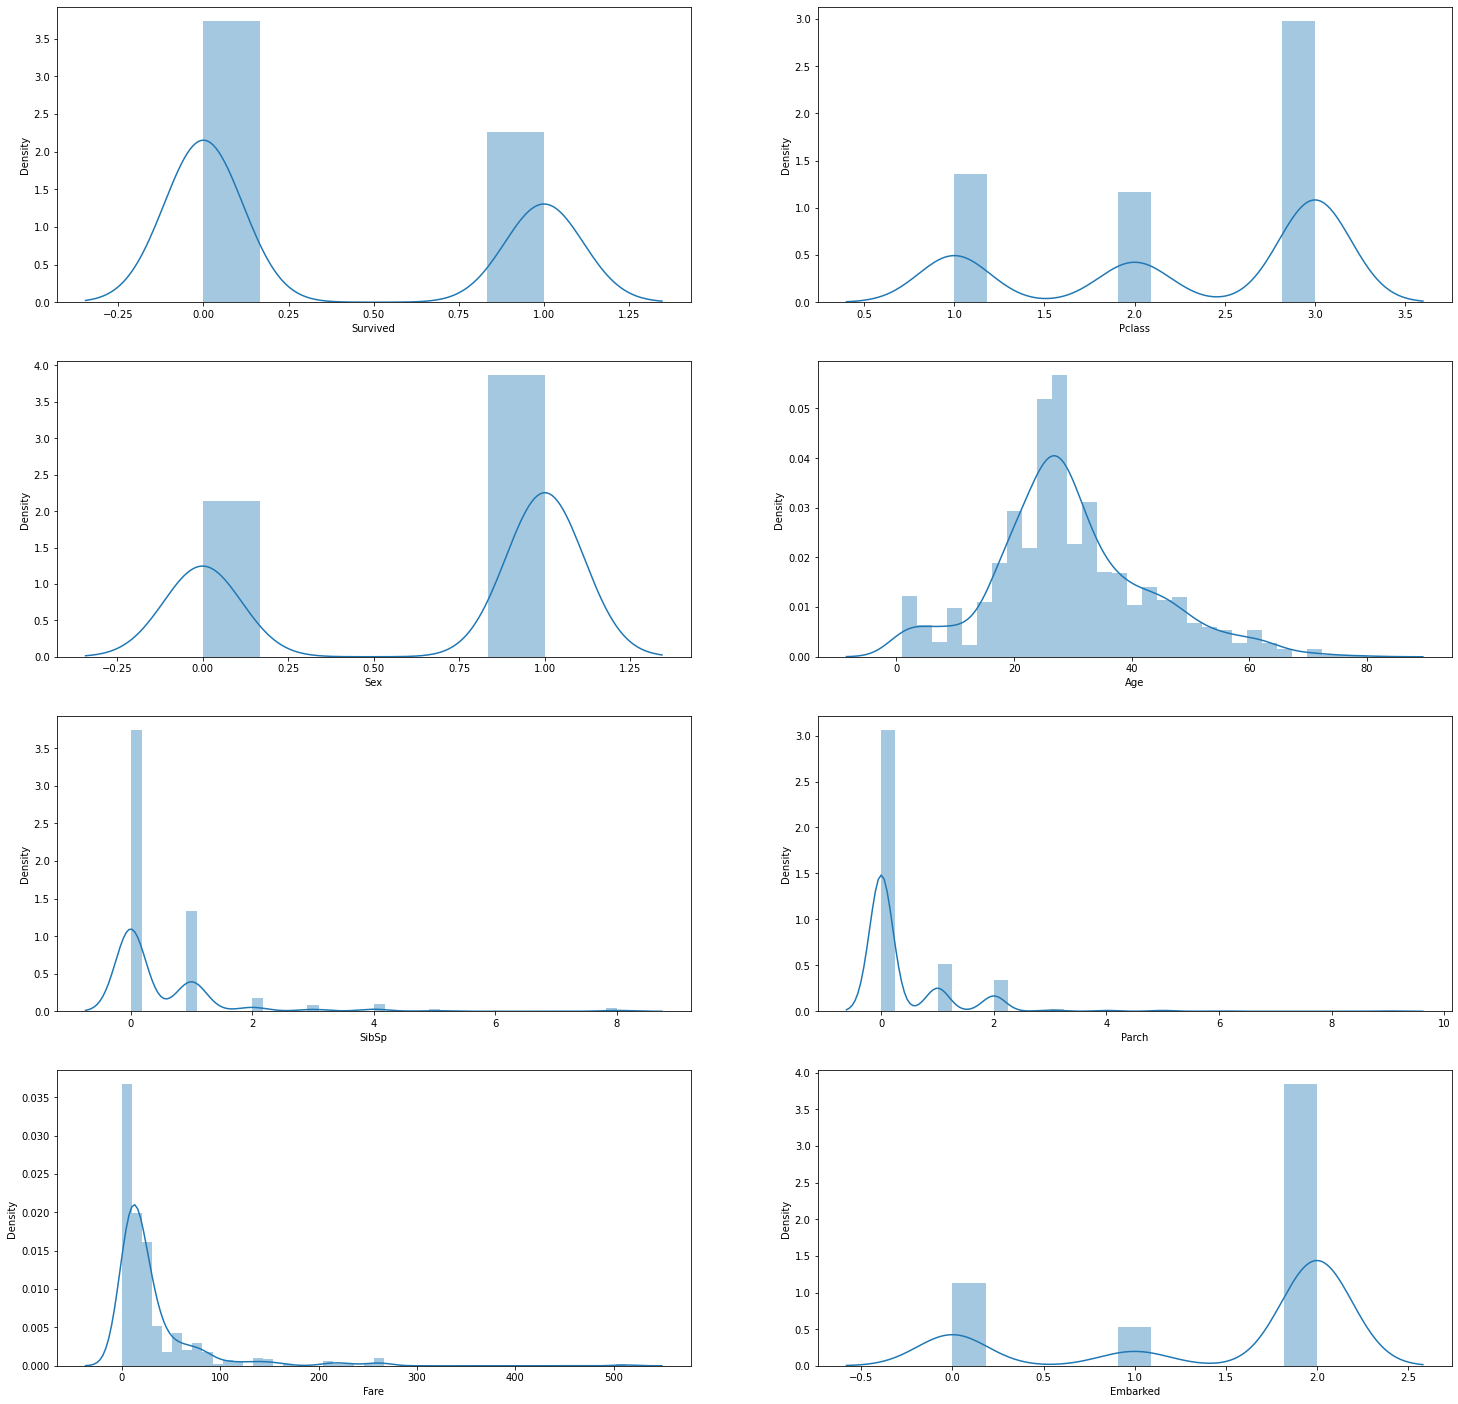

In [56]:
plt.figure(figsize = (25, 25))
count = 1

for column in train.columns:
    plt.subplot(4, 2, count)
    sns.distplot(train[column])
    plt.xlabel(column)
    count += 1

plt.show()

In [79]:
from scipy.stats import boxcox

train.Age = boxcox(train.Age)[0]

In [80]:
X = train[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
y = train['Survived']

In [81]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [82]:
from sklearn.decomposition import PCA

pca = PCA(n_components=None)
X = pca.fit_transform(X)

In [83]:
X.shape

(1309, 7)

In [84]:
X_train = X[:891]
X_test = X[891:]

y_train = y[:891]
y_test = y[891:]

In [85]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
print(accuracy_score(model.predict(X_test),y_test))

0.7583732057416268


In [86]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
print(accuracy_score(model.predict(X_test),y_test))

0.784688995215311


In [87]:
from sklearn.model_selection import GridSearchCV

In [88]:
grid = GridSearchCV(model, {'min_samples_leaf':[1,1000], 'max_depth':[1,200], 'random_state':[1,200], 'n_estimators':[1,100]})
grid.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [1, 200], 'min_samples_leaf': [1, 1000],
                         'n_estimators': [1, 100], 'random_state': [1, 200]})

In [89]:
print(grid.best_params_)

{'max_depth': 200, 'min_samples_leaf': 1, 'n_estimators': 100, 'random_state': 1}


In [90]:
model = RandomForestClassifier(max_depth=200, min_samples_leaf=1, n_estimators=100, random_state=1)
model.fit(X_train, y_train)
print(accuracy_score(model.predict(X_test),y_test))

0.7822966507177034


In [91]:
model = LogisticRegression()
model.fit(X_train, y_train)
print(accuracy_score(model.predict(X_test),y_test))

0.9330143540669856


In [69]:
confusion_matrix(model.predict(X_test),y_test)

array([[250,  12],
       [ 16, 140]])